In [1]:
pip install pytrends matplotlib pandas seaborn plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq

# setting up pytrend lib and keyword def

In [142]:
pytrends = TrendReq(hl = 'en-US', tz = 360)
keyword = "women helpline"

# Data Req

In [145]:
pytrends.build_payload([keyword], cat = 0, timeframe = 'today 12-m', geo = 'IN', gprop = '')

# State Wise Interest

In [120]:
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by = keyword, ascending = False).head(15)

C:\Users\ishaa\AppData\Local\Temp\ipykernel_11596\3040684810.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




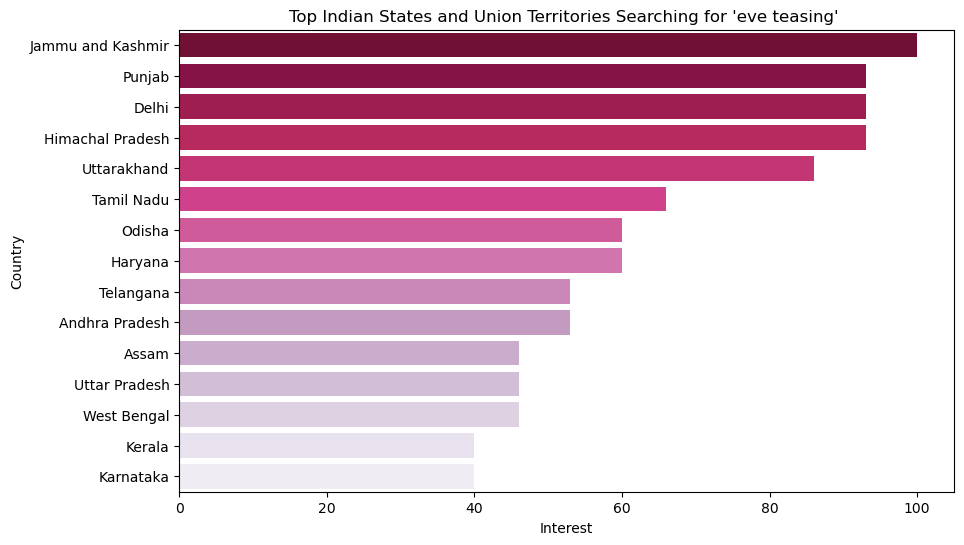

In [121]:
plt.figure(figsize = (10, 6))
sns.barplot(x = region_data[keyword], y = region_data.index, palette = "PuRd_r")
plt.title(f"Top Indian States and Union Territories Searching for '{keyword}' ")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show()

# World Map

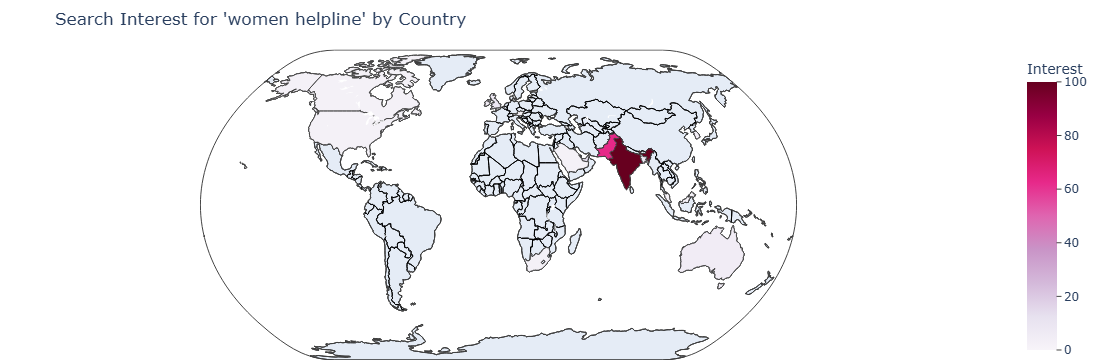

In [93]:
region_data = region_data.reset_index()

custom_scale = [
    (0.0, "#ffffff"),  # almost white
    (0.2, "#fce4f6"),  # faint pink/lavender
    (0.4, "#f3c3e4"),
    (0.6, "#d98bc2"),
    (0.8, "#b24599"),
    (1.0, "#7a0177")   # deep purple = high interest
]

fig = px.choropleth(
    region_data,
    locations='geoName',
    locationmode='country names',
    color=keyword,
    title=f"Search Interest for '{keyword}' by Country",
    color_continuous_scale=custom_scale,
    range_color=(0, region_data[keyword].max())
)

fig.update_geos(
    showcountries=True,
    countrycolor="gray",
    projection_type="natural earth"
)

fig.update_layout(
    coloraxis_colorbar=dict(title="Interest"),
    margin=dict(l=0, r=0, t=50, b=0),
)

fig.show()


# Time Wise Interest

In [146]:
time_df = pytrends.interest_over_time()

C:\Users\ishaa\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



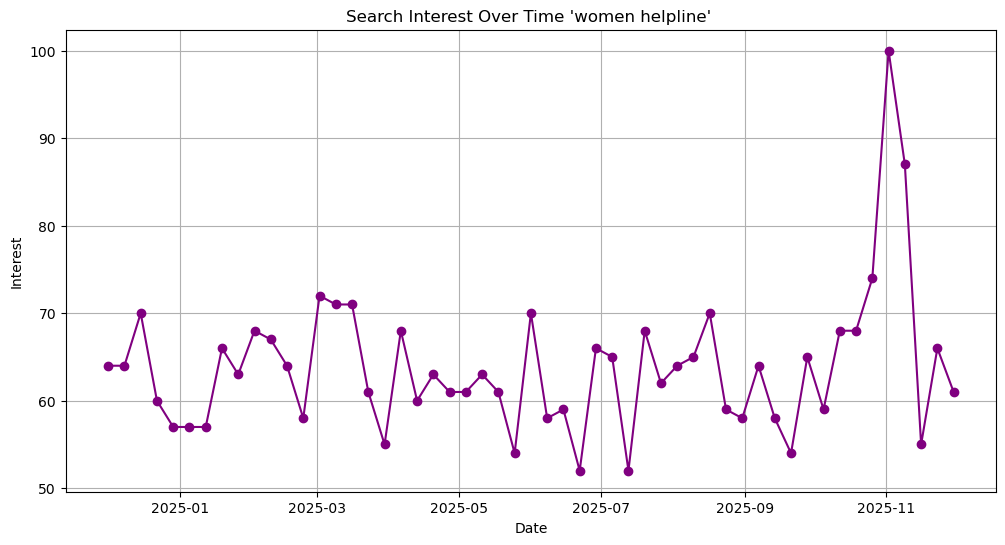

In [147]:
plt.figure(figsize = (12,6))
plt.plot(time_df.index, time_df[keyword], marker = 'o', color = 'purple')
plt.title(f"Search Interest Over Time '{keyword}' ")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.show()

# Comparing Multiple Keyword

In [135]:
keyw_list = ["domestic violence", "sexual harassment", "POSH act", "molestation helpline", "181 women helpline"]
pytrends.build_payload(keyw_list, cat = 0, timeframe = 'today 12-m', geo = 'IN', gprop = '')

C:\Users\ishaa\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



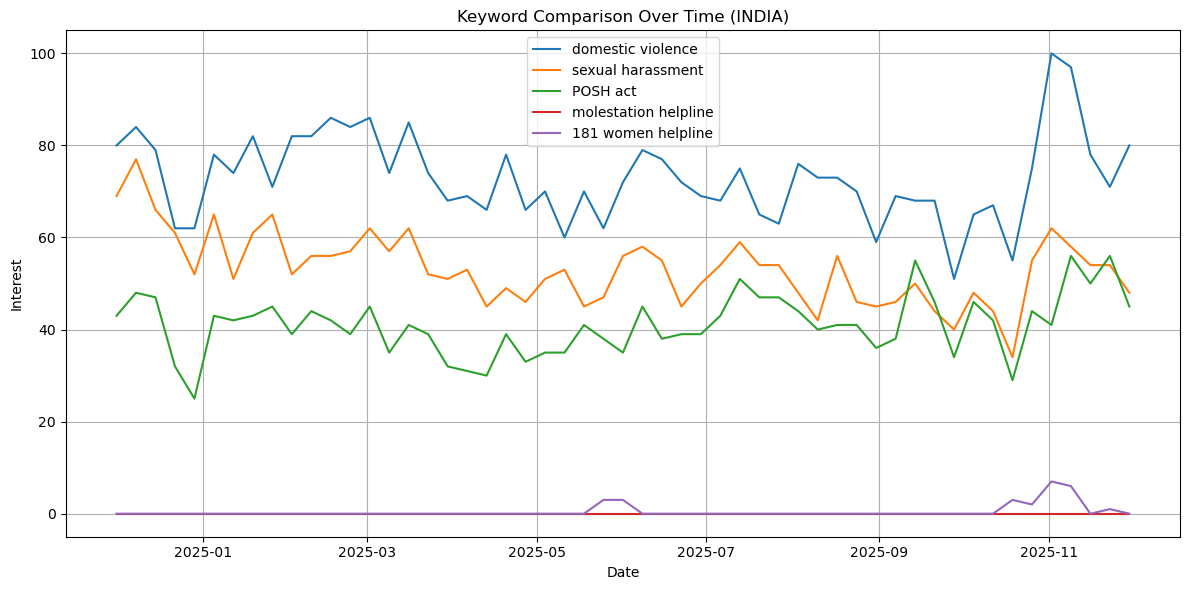

In [136]:
compare_df = pytrends.interest_over_time()

plt.figure(figsize=(12, 6))
for keyw in keyw_list:
    plt.plot(compare_df.index, compare_df[keyw], label=keyw)

plt.title("Keyword Comparison Over Time (INDIA)")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [140]:
# Create dataframe from regional interest data for all keywords

df_list = []

for keyw in keyw_list:
    pytrends.build_payload([keyw], cat=0, timeframe='today 12-m', geo='IN')
    
    region = pytrends.interest_by_region(resolution='REGION')
    region = region.reset_index()
    
    region["keyword"] = keyw
    region = region.rename(columns={keyw: "interest"})
    
    df_list.append(region)

df = pd.concat(df_list, ignore_index=True)

df.head()


,geoName,interest,keyword
0,Andaman and Nicobar Islands,0,domestic violence
1,Andhra Pradesh,22,domestic violence
2,Arunachal Pradesh,100,domestic violence
3,Assam,42,domestic violence
4,Bihar,18,domestic violence


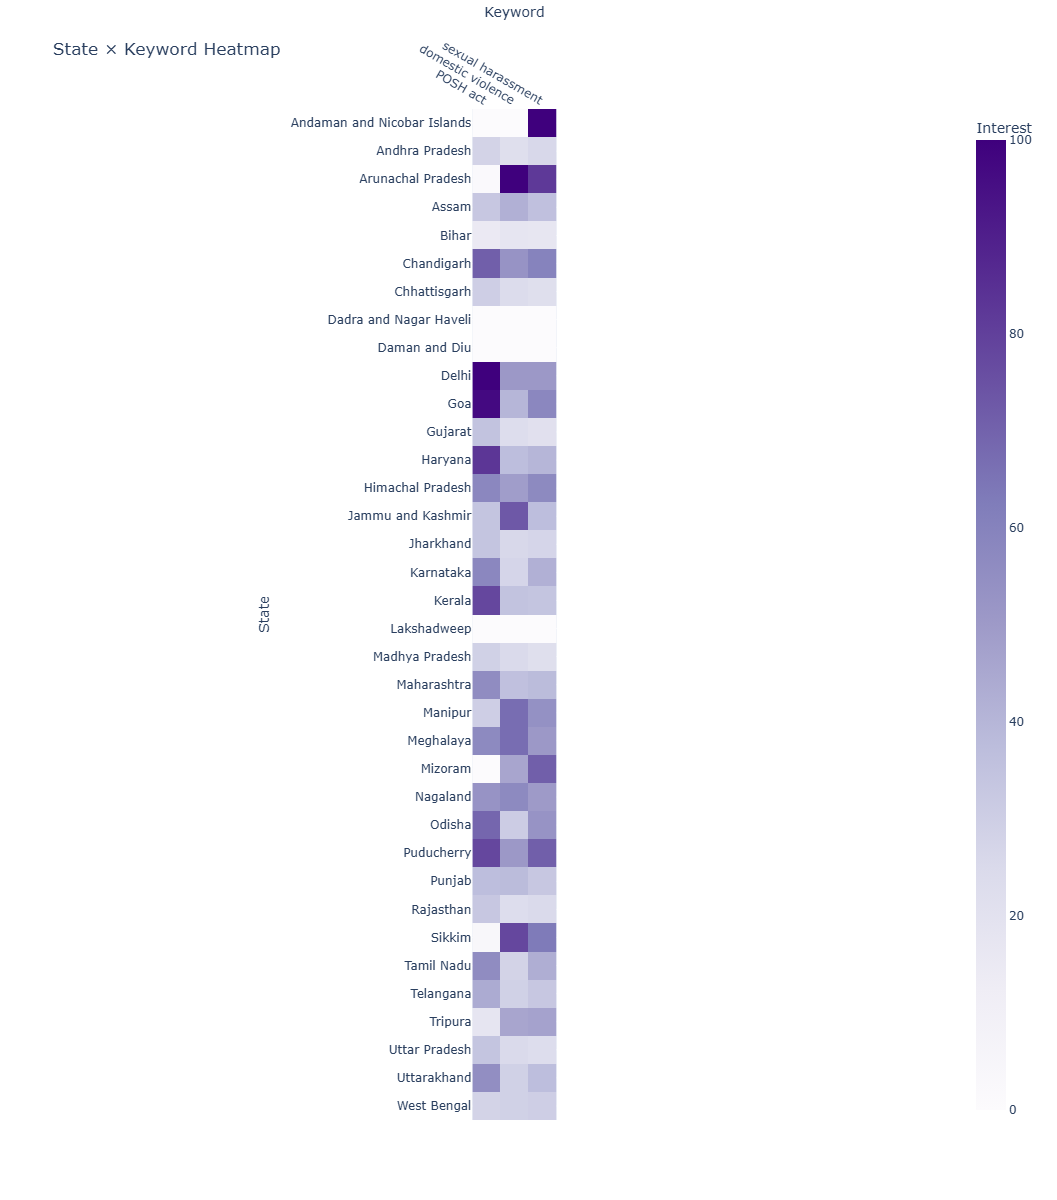

In [141]:
fig = px.imshow(
    state_keyword_matrix,
    title="State × Keyword Heatmap",
    labels=dict(x="Keyword", y="State", color="Interest"),
    color_continuous_scale="Purples",
    width=900,
    height=1200
)
fig.update_layout(xaxis_side="top")
fig.show()
